# Deep Learning Part

## PART 1 - MNIST Data Set Classification

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing-based machine learning tools.  
More information about the dataset can be found from: http://yann.lecun.com/exdb/mnist/

In [1]:
# Importing required libararies
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import applications, Model
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Gradeint Descent, Batch, Epoch and Iteration

In order to find a minima of a curve, we often use an iterative approach called "Gradient Descent".

As you experienced in the previous task, "Gradient Descent" algorithm contains an important parameter called "Learning Rate". In the beginning steps, the learning rate would be higher values and as we get closer to the minima(?) this rate would become smaller by the shorter step size. As we get closer to the minima, the loss (cost) functions will become smaller too.

Imagine we have a large number of data set e.g, 10,000. When we are going to train a network to update the weights, it is not enought to pass the whole data set only one time thourgh the network. In fact, it will lead to underfitting problem. Therefore, we will feed the network several times with the whole data set. The term "Epoch" represents this process. For instance, "One Epoch" means that the whole data set passed the network only once. There is no general rule to set the number of epochs; it is more dependent on the diversity of the data set.

Since we cannot pass all the data to the network at once (because of memory issues), we have to divide the data set into several parts. In other words, we have to divide data sets into a number of BATCHES.

The number of batches that are needed to complete one epoch is called "ITERATION". For example, if we have 500 images in our data set and set the number of batches equals to 50, then it takes 10 iteration to complete ONE epoch.

In [2]:
# loading data, split in train and test sets

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, x_train.dtype, 'in range', np.min(x_train), '-', np.max(x_train))
print(x_test.shape , x_test.dtype, 'in range', np.min(x_test), '-', np.max(x_test))

# TODO: How many images included in training and test data sets?
# What is the size of the image?

(60000, 28, 28) uint8 in range 0 - 255
(10000, 28, 28) uint8 in range 0 - 255


In [3]:
# Initial Parameters

num_classes = 10 # number of class labels
img_rows, img_cols = 28, 28 #input image dimension

batch_size = 128 
epochs = 20

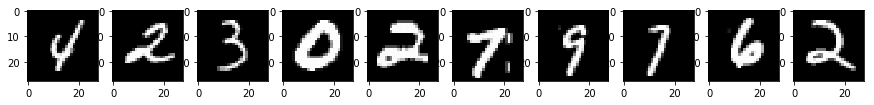

In [4]:
# Illustrating some of the images

plt.figure(figsize=(15,15))
for i in range (10):
    plt.subplot(1,10,i+1),plt.imshow(x_train[np.random.randint(1,len(x_train))],cmap='gray')


In [5]:
# reshaping the training and test images to the same size
if K.image_data_format() == 'channels_first': # theano backend
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: # tensorflow backend
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [6]:
# Nomalizing the pixel value train and test images into 0:1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
# convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

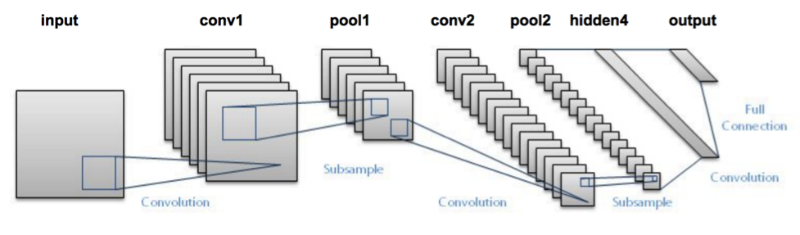

In [8]:
# LeNet architechture, for more explanation refere to the original paper :
# LeCun Y, Bottou L, Bengio Y, Haffner P. Gradient-based learning applied to document recognition. 
# Proceedings of the IEEE. 1998 Nov;86(11):2278-324.

from IPython.display import Image
Image('lenet.png') 


# note that the input image dimension and some parameters in our experiment are differnt from the original paper

In [9]:
# TODO: Read the following lines step by steps

# Building the following LeNet architecture step by step
model = Sequential()

# First layer: 32 2D convolutional with size of 3by3 with "rectified linear unit" as activation function.
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  strides=1, padding='same', input_shape=input_shape))


# Second layer: 2D layer: pooling layer (max-pooling) with the size of 2by2
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd layer: 64 2D convolutional with size of 3by3 with "rectified linear unit" as activation function.
model.add(Conv2D(64, (3, 3), activation='relu', strides=1, padding='same'))


# 4th layer: pooling layer (max-pooling) with the size of 2by2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Vectorize the resulted image
model.add(Flatten())


# 5th layer: fully-connected layer (Dense) with the 128 nodes and "rectified linear unit" as activation function.
model.add(Dense(128, activation='relu'))


model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               401536    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total para

In [10]:
# setting loss function, optimization method and evaluation metric

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0),
              metrics=['accuracy']) 

# SGD: Stochastic gradient descent optimizer.
# LR represent learning rate
# momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
# decay: float >= 0. Learning rate decay over each update.

In [11]:
# training the model and calculate the accuracy of train and test data
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

# TODO: What is the relation between the number of epochs and training accuracy?
# TODO: Are the accuracy changes in train and test data consistent?
# TODO: Was the model overfitted? Why?

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 37s 609us/step - loss: 1.1681 - acc: 0.7144 - val_loss: 0.3520 - val_acc: 0.8961
Epoch 2/3
60000/60000 [==============================] - 35s 578us/step - loss: 0.2982 - acc: 0.9107 - val_loss: 0.2275 - val_acc: 0.9353
Epoch 3/3
60000/60000 [==============================] - 35s 579us/step - loss: 0.2200 - acc: 0.9359 - val_loss: 0.1917 - val_acc: 0.9455


## PART 2 - Transfer Learning

In classical supervised machine learning methods, we train a model with some data and validate the learned model with unseen data from the same category. For instance, we tarin a model with 10000 Brain MRI and validate the learned model with another 1000 Brain MRI for the task of lesion segmentation. Now, if you want to perform the tumor segmentation on MRI images, then we need to train a new model.

Imagine a scenario that we do not have sufficient labeled tumoral Brain MR data to train a separate network.
The question is: Can we employ the trained network with Brain MRI on lesion task for tumor segmentation?

Transfer learning allows us to deal with this scenario by leveraging the already existing labeled data of some related task or domain. That means, we can store the knowledge gained from Brain lesion MRI and apply it on Brain Tumor MRI data.

One of the most common ways of transfer learning is to use pre-trained convolutional neural networks. In CNN, the first few convolutional layers capture the low level image features such as edges and corners and the rest of layers try to capture more
abstract features.

We can train a CNN with avaialble huge amount of labeled image data like ImageNet and use that features of CNN as a pre-trained network to train a new model on these extracted features. In practice, we either keep the pre-trained parameters fixed or tune them with a small learning rate in order to ensure that we do not unlearn the previously acquired knowledge. This simple approach has been shown to achieve astounding results on an array of vision tasks as well as tasks that rely on visual input such as image captioning. A model trained on ImageNet seems to capture details about the way animals and objects are structured and composed that is generally relevant when dealing with images. As such, the ImageNet task seems to be a good proxy for general computer vision problems, as the same knowledge that is required to excel and it is also relevant for many other tasks.

Fore more details you would read : http://ruder.io/transfer-learning/




## Task Aim
To classify skis cancerous images into 2 classes (Melonoma and Nevi) by using the concept of transfer learning (feature extraction from a pre-trained model + MLP).

## Network: VGG16

VGG is a convolutional neural network for image classification. Given an image, the VGG network will output probabilities of the different classes that an image could potentially belong to. For example, the VGG network might output values of 0.96for Melanoma and 0.04 for Nevi,which means with probability of 96percent the input image would belong to Melanoma class and with probability of 4 percent the input image would belong to Nevi class.

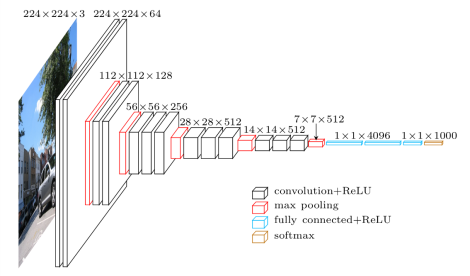

In [12]:
### The architect of the network is as follow:

Image('VGG16-2.png') 

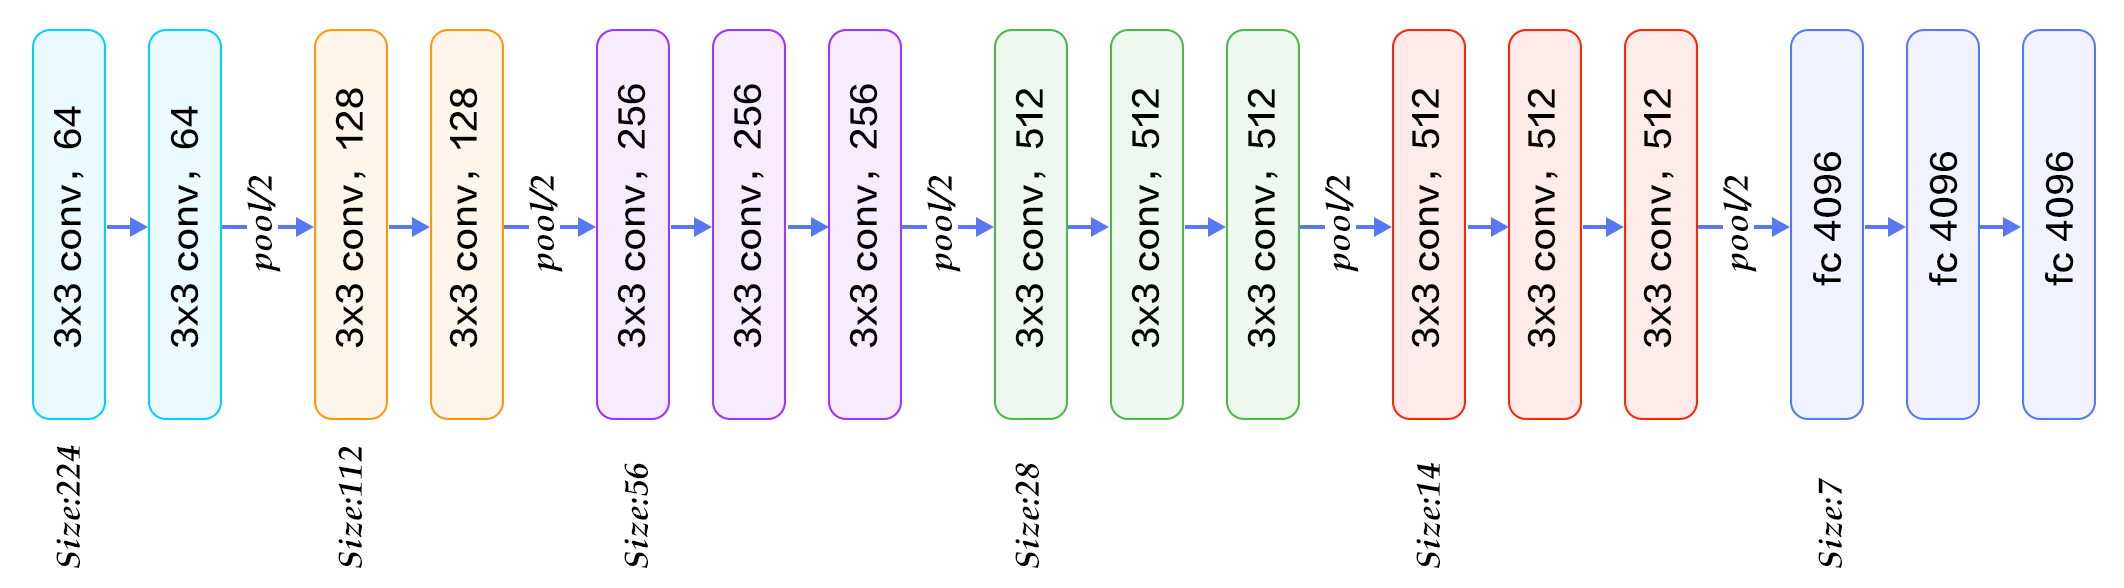

In [13]:
### Or this figure illustrates it more clrearly

Image('VGG16.png') 

In [4]:
# Model Architecture

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
import numpy as np

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))
    model.summary()

In [5]:
# parameters
train_data_dir = 'Data/train'
validation_data_dir = 'Data/validation'
nb_train_samples = 1000
nb_validation_samples = 200
img_width, img_height = 224, 224
epochs = 50
batch_size = 20


In [6]:
# loading the pre-trained model

model = applications.VGG16(include_top=False, weights='imagenet')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [7]:
# feature extraction from a VGG16 pretrained model (for training data)

datagen = ImageDataGenerator(rescale=1. / 255)

generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

features_train = model.predict_generator(
        generator, nb_train_samples // batch_size, max_queue_size=1)

Found 1000 images belonging to 2 classes.


In [8]:
# feature extraction from a VGG16 pretrained model (for validation data)

datagen = ImageDataGenerator(rescale=1. / 255)

generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size, max_queue_size=1)

Found 200 images belonging to 2 classes.


In [9]:
# training a small MLP with extracted features from the pre-trained model

train_data = features_train
train_labels = np.array([0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))

validation_data = features_validation
validation_labels = np.array([0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))

# Building the MLP model
model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 6,423,041
Trainable params: 6,423,041
Non-trainable params: 0
_________________________________________________________________


In [10]:
# setting loss function, optimization method and evaluation metric
model.compile(optimizer='SGD',loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# training the model and calculate the accuracy of train and test data
model.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))

# TODO: You can choose different values for epochs and batch size and find out how they effect on the results?
# TODO: What is the relation between the number of epochs and training accuracy?
# TODO: Are the accuracy changes in train and test data consistent?
# TODO: Was the model overfitted? Why?

Train on 1000 samples, validate on 200 samples
Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.7818 - acc: 0.5610 - val_loss: 0.6597 - val_acc: 0.5350
Epoch 2/50
1000/1000 [==============================] - 1s 540us/step - loss: 0.6349 - acc: 0.6210 - val_loss: 0.5887 - val_acc: 0.6550
Epoch 3/50
1000/1000 [==============================] - 1s 536us/step - loss: 0.5837 - acc: 0.7000 - val_loss: 0.5676 - val_acc: 0.6350
Epoch 4/50
1000/1000 [==============================] - 1s 537us/step - loss: 0.5679 - acc: 0.7290 - val_loss: 0.5267 - val_acc: 0.6950
Epoch 5/50
1000/1000 [==============================] - 1s 543us/step - loss: 0.5236 - acc: 0.7430 - val_loss: 0.4227 - val_acc: 0.8600
Epoch 6/50
1000/1000 [==============================] - 1s 535us/step - loss: 0.5431 - acc: 0.7360 - val_loss: 0.5105 - val_acc: 0.7500
Epoch 7/50
1000/1000 [==============================] - 1s 540us/step - loss: 0.4972 - acc: 0.7580 - val_loss: 0.6666 - val_acc: 0.5900
Epo